In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.width', 1000)

sns.set_theme(style="whitegrid")


In [140]:
processed_data_path = '../data_processed/'
file_path = os.path.join(processed_data_path, 'indicadores_mensal.csv')


df = pd.read_csv(file_path, index_col='data', parse_dates=['data'])



Visualização de indicadores estatísticos

In [134]:
estatisticas = df.describe().T

print(estatisticas)

                          count        mean        std    min         25%         50%         75%     max
selic_media_mensal         67.0    9.376387   4.565977   2.00    4.271552   11.072581   13.459677   15.00
pmc_vendas_varejo          67.0  101.143134   9.330226  75.02   96.890000  100.200000  105.255000  126.60
gtrends_magazine_luiza     67.0   18.701493   6.871141   8.00   14.000000   18.000000   22.000000   37.00
gtrends_casas_bahia        67.0   16.537313   7.996833   7.00   11.000000   16.000000   20.000000   42.00
gtrends_mercado_livre      67.0   56.223881  16.248842  35.00   41.500000   54.000000   64.500000  100.00
ipca_variacao_mensal       67.0    0.480746   0.430853  -0.68    0.240000    0.440000    0.780000    1.62
icc_confianca_consumidor   67.0  117.167910  10.249738  96.82  108.630000  115.210000  125.500000  138.22
desemprego_taxa            67.0    9.807463   3.081632   5.80    7.400000    8.700000   12.700000   14.90


Visualizar a correlação de todas as colunas de nosso dataframe

> (Quanto maior o valor (1.0) e escuro (vermelho) maior será a correlação positiva dos indicadores. Demostrando que quando um aumenta o outro também aumentára)
>
> (Quanto menor o valor (-1.0) e escuro (azul) maior será a correlação negativa dos indicadores. Demostrando que quando um aumenta o outro diminui)

<Axes: >

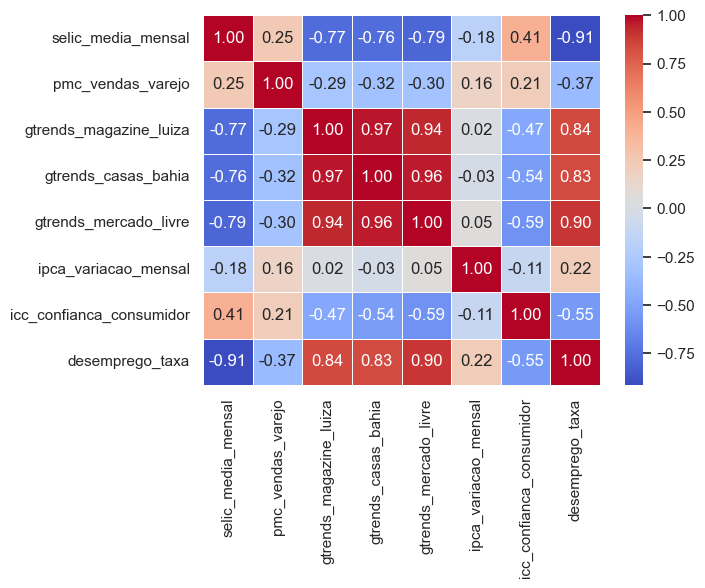

In [135]:
corr = df.corr(method='pearson')

plt.Figure(figsize=(14,10))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

Análise para defasagem, na qual indica quanto tempo um indicador impacta ao outro, para cada coluna no dataframe

In [ ]:
# .shift(3) "empurra" os dados 3 meses para frente.
# O valor da Selic de Janeiro/2020 aparecerá na linha de Abril/2020.
# Permitindo correlacionar a Selic de 3 meses atrás com as Vendas de hoje.

df_defasagem = df.copy()

# Selic
df_defasagem['selic_def_3M'] = df['selic_media_mensal'].shift(3)
df_defasagem['selic_def_6M'] = df['selic_media_mensal'].shift(6)
df_defasagem['selic_def_9M'] = df['selic_media_mensal'].shift(9)

# Desemprego
df_defasagem['desemprego_def_3M'] = df['desemprego_taxa'].shift(3)

# IPCA
df_defasagem['ipca_defasagem_3M'] = df['ipca_variacao_mensal'].shift(3)

# Gtrends
df_defasagem['gtrends_magalu_def_1M'] = df['gtrends_magazine_luiza'].shift(1)
df_defasagem['gtrends_meli_def_1M'] = df['gtrends_mercado_livre'].shift(1)

df_defasagem = df_defasagem.dropna()



Visualizar correlação das colunas, incluindo aquelas com defasagem

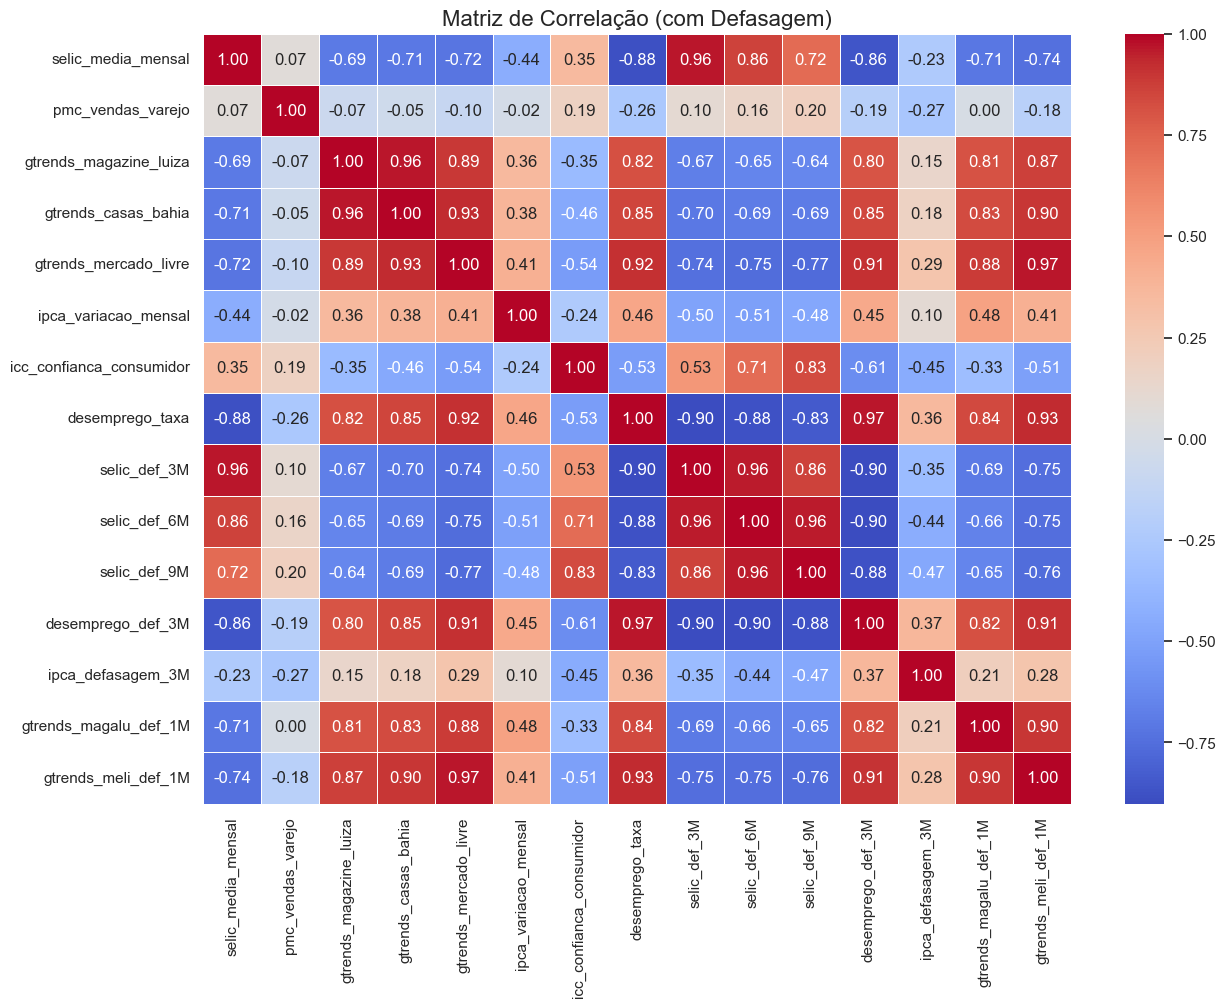

In [137]:
corr_matrix_lagged = df_defasagem.corr(method='pearson')


plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix_lagged, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=.5

)
plt.title('Matriz de Correlação (com Defasagem)', fontsize=16)
plt.show()

Visualização com gráfico de linhas, para visualizar o impacto da selic, com as pesquisas sob a ótica das empresas analisadas

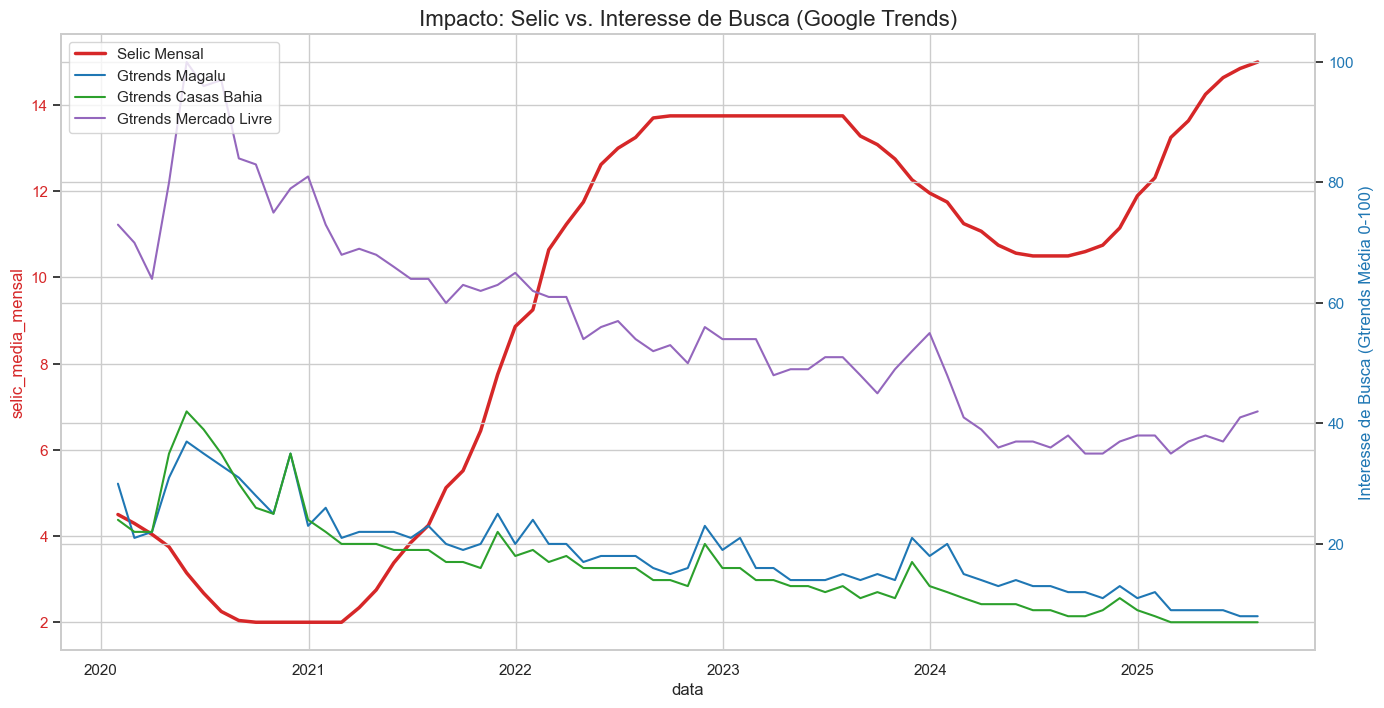

In [138]:
colunas_gtrends = ['gtrends_magazine_luiza', 'gtrends_casas_bahia', 'gtrends_mercado_livre']

plot_config = {
    'gtrends_magazine_luiza': {
        'color': 'tab:blue', 
        'label': 'Gtrends Magalu'
    },
    'gtrends_casas_bahia': {
        'color': 'tab:green', 
        'label': 'Gtrends Casas Bahia'
    },
    'gtrends_mercado_livre': {
        'color': 'tab:purple', 
        'label': 'Gtrends Mercado Livre'
    }
}

fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : Selic (Esquerda)
cor_selic = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('selic_media_mensal', color = cor_selic)

ax1.plot(
    df.index,
    df['selic_media_mensal'],
    color = cor_selic,
    label = 'Selic Mensal',
    linewidth=2.5
)
ax1.tick_params(axis='y', labelcolor=cor_selic)


# --- Eixo 2 : Gtrends (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:blue'
ax2.set_ylabel('Interesse de Busca (Gtrends Média 0-100)', color=cor_ax2)

for col in colunas_gtrends:
    if col in plot_config:
        config = plot_config[col]

        ax2.plot(
            df.index, 
            df[col], 
            color= config['color'], 
            label= config['label'] # Etiqueta para a legenda
        )
ax2.tick_params(axis='y', labelcolor=cor_ax2)

# --- Título e Legenda ---
fig.tight_layout() # Ajusta o layout para evitar sobreposição
plt.title('Impacto: Selic vs. Interesse de Busca (Google Trends)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')